# Labolatorium 8
Na podstawie danych zawierających zdjęcia twarzy kotów opracuj sieć GAN do generowania nowych obrazów kotów.

In [19]:
import os
import math
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from PIL import Image

## Load Data and Explore

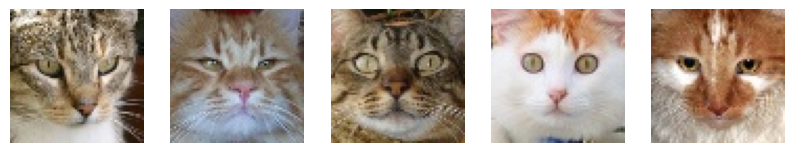

In [20]:
class CatDataset(Dataset):
    def __init__(self, image_dir, transform=None):
        self.image_dir = image_dir
        self.transform = transform
        self.image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir) if img.endswith('.jpg')]

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image = Image.open(image_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image

transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

image_dir = '/Users/krzysztofbabicki/Documents/Edukacja/WSEI/WSEI - Semestr I/Zaawansowane metody sztucznej inteligencji/Laby/Lab8/cats'
cat_dataset = CatDataset(image_dir, transform=transform)
dataloader = DataLoader(cat_dataset, batch_size=64, shuffle=True)

def show_images(dataset, num_images=5):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        image = dataset[i]
        image = image / 2 + 0.5  # unnormalize
        np_image = image.numpy()
        plt.subplot(1, num_images, i + 1)
        plt.axis('off')
        plt.imshow(np.transpose(np_image, (1, 2, 0)))
    plt.show()

show_images(cat_dataset)

## Define Discriminator & Generator

In [21]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 64, 4, stride=2, padding=1),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, 128, 4, stride=2, padding=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(128, 256, 4, stride=2, padding=1),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(256, 512, 4, stride=2, padding=1),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(512, 1, 4, stride=1, padding=0),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x).view(-1, 1).squeeze(1)

class Generator(nn.Module):
    def __init__(self, z_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.ConvTranspose2d(z_dim, 512, 4, stride=1, padding=0),
            nn.BatchNorm2d(512),
            nn.ReLU(True),
            nn.ConvTranspose2d(512, 256, 4, stride=2, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(True),
            nn.ConvTranspose2d(256, 128, 4, stride=2, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(True),
            nn.ConvTranspose2d(128, 64, 4, stride=2, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            nn.ConvTranspose2d(64, 3, 4, stride=2, padding=1),
            nn.Tanh()
        )

    def forward(self, x):
        return self.model(x)

## Define Losses

In [22]:
def plot_losses(d_losses, g_losses):
    plt.figure(figsize=(10, 5))
    plt.title("Discriminator and Generator Loss During Training")
    plt.plot(d_losses, label="D Loss")
    plt.plot(g_losses, label="G Loss")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

## Train the network

Epoch [1/50], D Loss: 0.5916, G Loss: 5.2598
Epoch [2/50], D Loss: 0.7498, G Loss: 3.8208
Epoch [3/50], D Loss: 0.6903, G Loss: 4.5393
Epoch [4/50], D Loss: 0.6556, G Loss: 5.0244
Epoch [5/50], D Loss: 0.5719, G Loss: 4.9603
Epoch [6/50], D Loss: 0.6156, G Loss: 4.5665
Epoch [7/50], D Loss: 0.5402, G Loss: 4.5674
Epoch [8/50], D Loss: 0.5423, G Loss: 4.5855
Epoch [9/50], D Loss: 0.4500, G Loss: 4.6426
Epoch [10/50], D Loss: 0.4189, G Loss: 4.9042


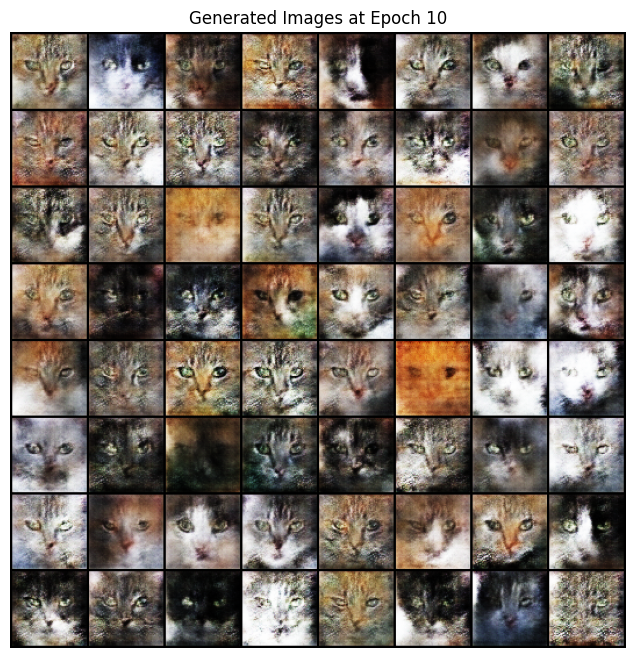

Epoch [11/50], D Loss: 0.3426, G Loss: 5.2948
Epoch [12/50], D Loss: 0.3067, G Loss: 5.8565
Epoch [13/50], D Loss: 0.3254, G Loss: 5.7337
Epoch [14/50], D Loss: 0.1991, G Loss: 6.3551
Epoch [15/50], D Loss: 0.2693, G Loss: 6.0057
Epoch [16/50], D Loss: 0.2294, G Loss: 6.0644
Epoch [17/50], D Loss: 0.2092, G Loss: 6.8913
Epoch [18/50], D Loss: 0.2071, G Loss: 6.7894
Epoch [19/50], D Loss: 0.1971, G Loss: 6.7139
Epoch [20/50], D Loss: 0.1185, G Loss: 6.7338


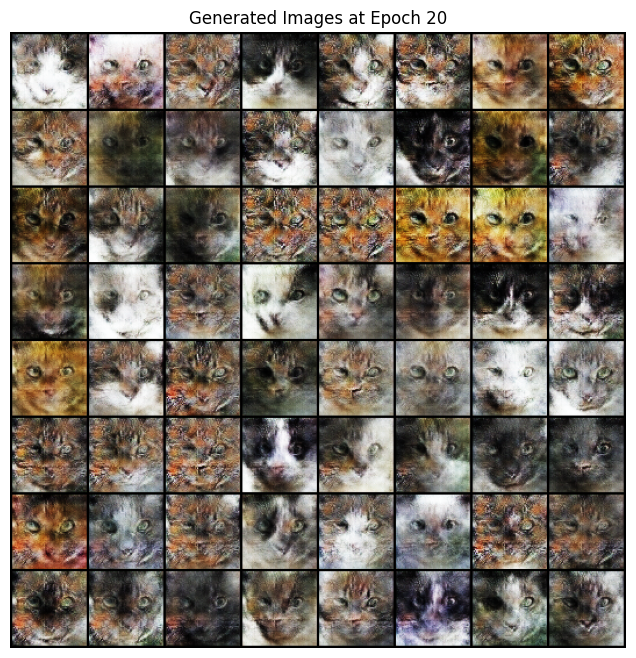

Epoch [21/50], D Loss: 0.1962, G Loss: 7.2427
Epoch [22/50], D Loss: 0.1581, G Loss: 7.1208
Epoch [23/50], D Loss: 0.2413, G Loss: 6.8345
Epoch [24/50], D Loss: 0.1309, G Loss: 7.3405
Epoch [25/50], D Loss: 0.2026, G Loss: 6.9817
Epoch [26/50], D Loss: 0.1357, G Loss: 7.7533
Epoch [27/50], D Loss: 0.1682, G Loss: 7.0365
Epoch [28/50], D Loss: 0.1460, G Loss: 7.1417
Epoch [29/50], D Loss: 0.1319, G Loss: 7.4489
Epoch [30/50], D Loss: 0.1581, G Loss: 6.9517


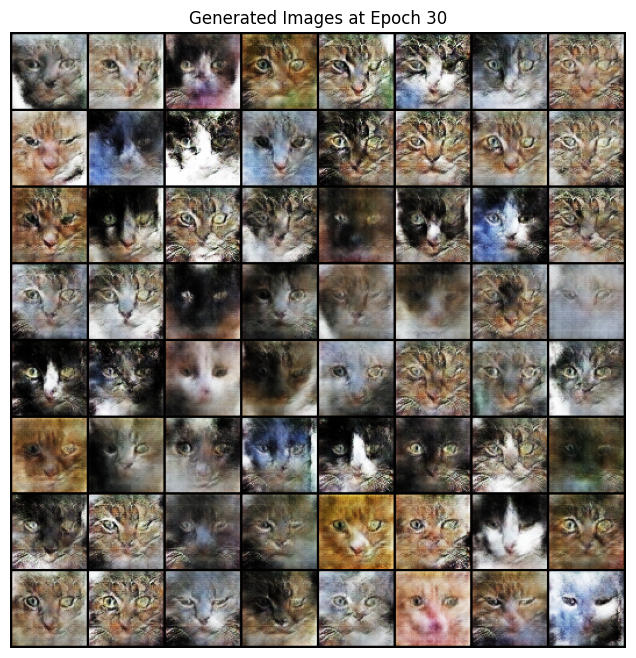

Epoch [31/50], D Loss: 0.1535, G Loss: 7.9465
Epoch [32/50], D Loss: 0.1220, G Loss: 7.0921
Epoch [33/50], D Loss: 0.1483, G Loss: 7.3161
Epoch [34/50], D Loss: 0.0882, G Loss: 7.2364
Epoch [35/50], D Loss: 0.1790, G Loss: 6.9051
Epoch [36/50], D Loss: 0.1378, G Loss: 7.1554
Epoch [37/50], D Loss: 0.1204, G Loss: 7.8910
Epoch [38/50], D Loss: 0.1121, G Loss: 8.1317
Epoch [39/50], D Loss: 0.1141, G Loss: 7.2209
Epoch [40/50], D Loss: 0.0931, G Loss: 7.6659


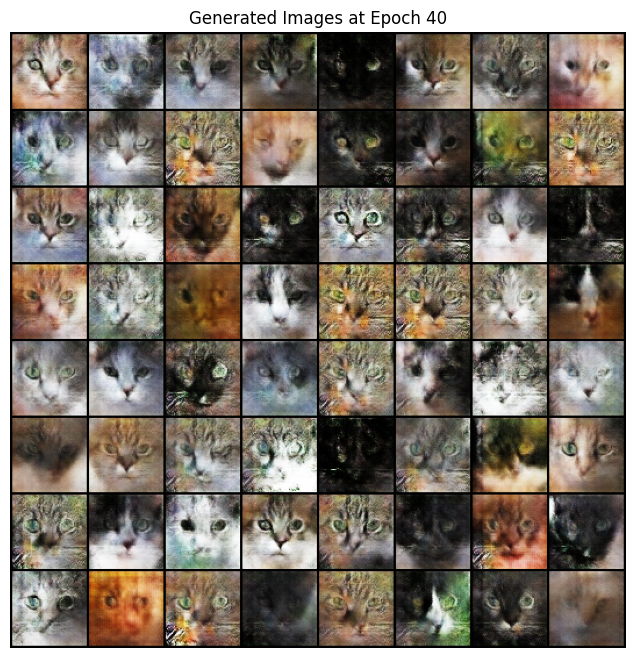

Epoch [41/50], D Loss: 0.1005, G Loss: 7.6700
Epoch [42/50], D Loss: 0.0843, G Loss: 7.5016
Epoch [43/50], D Loss: 0.0796, G Loss: 8.0414
Epoch [44/50], D Loss: 0.1174, G Loss: 8.0739
Epoch [45/50], D Loss: 0.1813, G Loss: 6.8527
Epoch [46/50], D Loss: 0.2144, G Loss: 6.6594
Epoch [47/50], D Loss: 0.0607, G Loss: 7.4231
Epoch [48/50], D Loss: 0.0875, G Loss: 7.5708
Epoch [49/50], D Loss: 0.1089, G Loss: 8.0766
Epoch [50/50], D Loss: 0.1000, G Loss: 7.1815


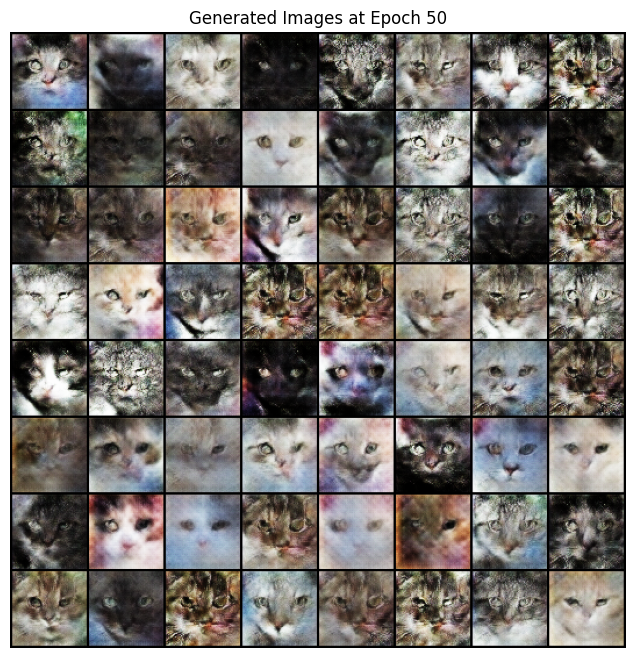

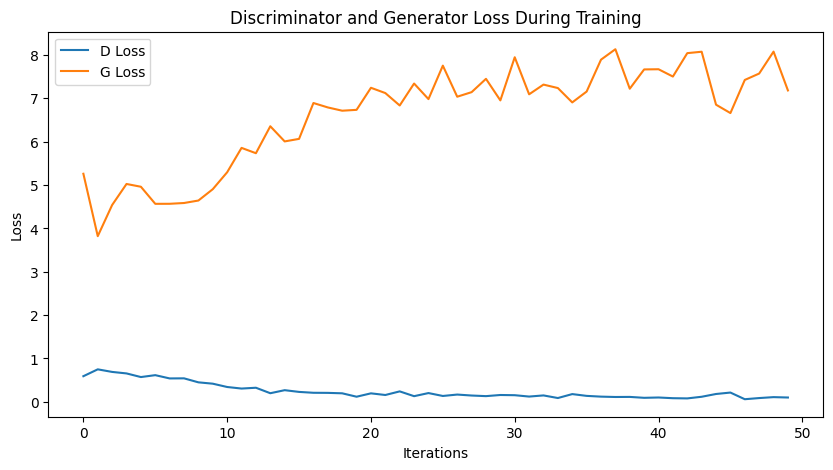

In [23]:
import torchvision.utils as vutils
import pickle as pkl

z_dim = 100
discriminator = Discriminator()
generator = Generator(z_dim)

# Loss and optimizers
criterion = nn.BCELoss()
d_optimizer = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))
g_optimizer = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))

def train_gan(dataloader, discriminator, generator, criterion, d_optimizer, g_optimizer, z_dim, num_epochs=100):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    discriminator.to(device)
    generator.to(device)

    d_losses = []
    g_losses = []
    fixed_samples = []

    for epoch in range(num_epochs):
        epoch_d_loss = 0.0
        epoch_g_loss = 0.0
        for i, real_images in enumerate(dataloader):
            batch_size = real_images.size(0)
            real_images = real_images.to(device)

            # Train Discriminator
            d_optimizer.zero_grad()
            real_labels = torch.ones(batch_size, device=device)
            fake_labels = torch.zeros(batch_size, device=device)

            outputs = discriminator(real_images)
            d_loss_real = criterion(outputs, real_labels)
            d_loss_real.backward()

            z = torch.randn(batch_size, z_dim, 1, 1, device=device)
            fake_images = generator(z)
            outputs = discriminator(fake_images.detach())
            d_loss_fake = criterion(outputs, fake_labels)
            d_loss_fake.backward()
            d_optimizer.step()

            d_loss = d_loss_real + d_loss_fake
            epoch_d_loss += d_loss.item()

            # Train Generator
            g_optimizer.zero_grad()
            z = torch.randn(batch_size, z_dim, 1, 1, device=device)
            fake_images = generator(z)
            outputs = discriminator(fake_images)
            g_loss = criterion(outputs, real_labels)
            g_loss.backward()
            g_optimizer.step()

            epoch_g_loss += g_loss.item()

        d_losses.append(epoch_d_loss / len(dataloader))
        g_losses.append(epoch_g_loss / len(dataloader))

        print(f'Epoch [{epoch+1}/{num_epochs}], D Loss: {epoch_d_loss / len(dataloader):.4f}, G Loss: {epoch_g_loss / len(dataloader):.4f}')

        # Save generated images
        with torch.no_grad():
            fixed_z = torch.randn(64, z_dim, 1, 1, device=device)
            fixed_fake_images = generator(fixed_z).detach().cpu()
            fixed_samples.append(fixed_fake_images)

        if (epoch+1) % 10 == 0:
            plt.figure(figsize=(8, 8))
            plt.axis("off")
            plt.title(f"Generated Images at Epoch {epoch+1}")
            plt.imshow(np.transpose(vutils.make_grid(fixed_fake_images, padding=2, normalize=True), (1, 2, 0)))
            plt.show()

    # Save fixed samples to file
    with open('fixed_samples.pkl', 'wb') as f:
        pkl.dump(fixed_samples, f)

    plot_losses(d_losses, g_losses)

# Train the GAN
num_epochs = 50
train_gan(dataloader, discriminator, generator, criterion, d_optimizer, g_optimizer, z_dim, num_epochs=num_epochs)
